# VI.ИНТЕРПОЛИРОВАНИЕ ФУНКЦИЙ
![vi.png](vi.png)

<font size="5">
    Для каждой пары соседних точек, ошибка линейной интерполяции вычисляется по $R = max \frac{f^{(2)}(x)}{2!}(x-x_{k})(x-x_{k+1})$<br>
    $R = max |\frac{-sin(x)}{2}(x-x_{k})(x-x_{k+1})|$<br>
    Так как sin(x) возрастает на $[0,1]$, ошибка будет наибольшей на $[0.9,1]$<br>

0.002499999974994998
Ответ:  0.001051838720489379


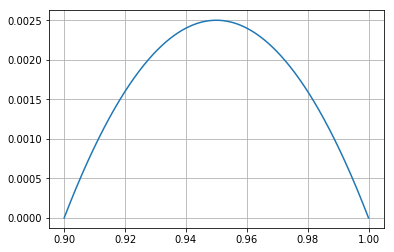

In [14]:
import numpy as np
def p(x):
    return abs((x-0.9)*(x-1))

ox = np.linspace(0.9,1,10**4)
y = p(ox)
import matplotlib.pyplot as plt

plt.plot(ox,y)
plt.grid()
MAX = max(y)
print(MAX)
answer = np.sin(1)*MAX/2
print("Ответ: ", answer)

<font size="5">
    Если функция n+1 раз дифференцируема, то f(x) - P(x) оценивается как:<br>
    $R_{n} = \frac{f^{(n+1)}(ξ)}{(n+1)!}(x-x_{0})(x-x_{1})(x-x_{2})...(x-x_{n})$, где $ξ \in (x_{1},x_{n})$<br>
    или<br>
    $R_{n} \leq max_{x \in (x_{1},x_{n})}\frac{[f^{(n+1)}(x)]}{(n+1)!}(x-x_{0})(x-x_{1})(x-x_{2})...(x-x_{n})$

<font size="5">
    В данной задаче, точек всего 11<br>
    $f^{(12)}(x) = sin(x)$<br>
    $max_{x \in (0,1)}[f^{(12)}(x)] = sin(1)$<br><br>
    $R_{n} = \frac{sin(1)}{12!}$

In [7]:
import numpy as np
import math

R = np.sin(1)/math.factorial(12)
print(R)

1.7567185262176504e-09


4.166144492273788e-06


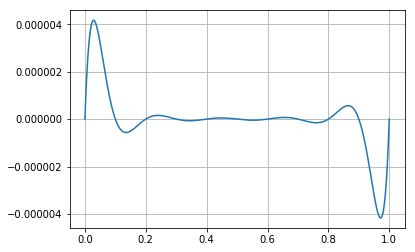

In [8]:
def p(x):
    return x*(x-0.1)*(x-0.2)*(x-0.3)*(x-0.4)*(x-0.5)*(x-0.6)*(x-0.7)*(x-0.8)*(x-0.9)*(x-1)

ox = np.linspace(0,1,10**5)
y = p(ox)
import matplotlib.pyplot as plt

plt.plot(ox,y)
plt.grid()
MAX = max(y)
print(MAX)

In [5]:
err = MAX*R
print(err)

7.31874321247699e-15


# 8.13

<font size="5">
    Задана табличная функция cos(x). С какой точностью можно восстановить значение в точке $x = 7π/24$, если известно, что функция в узлах задана с абсолютной погрешностью, не превосходящей 0.01 ?

<font size="5">
    Рассмотрим влияния возмущений $δf_{i}$. Интерполяционный многочлен $P_{n}(x,f)$ заменится многочленом $P_{n}(x,f+δf)$<br>
    В силу линейности по f:<br>
    $P_{n}(x,f+δf) = P_{n}(x,f) + P_{n}(x,δf)$<br>
    Возмущение $P_{n}(x,δf)$, которое претерпевает интерполяционный многочлен, можно оценить как:<br><br>
    $||P_{n}(x,δf)|| \leq ||δf(x)|| \sum_{k=0}^{n}|l_{k}(x)| \leq 0.01*\sum_{k=0}^{3}|l_{k}(x)|$<br><br>
    Рассмотрим функции $l_{k}$:

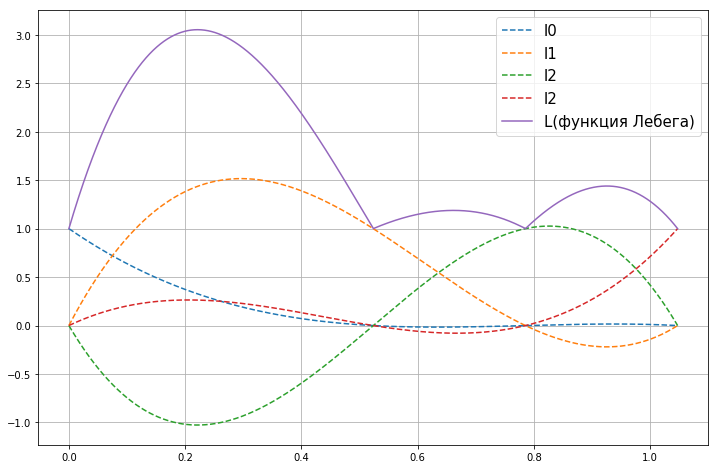

In [36]:
x = [0,p/6,p/4,p/3]
def l(z,i):
    r = 1
    for k in [0,1,2,3]:
        if k != i:
            r *= (z-x[k])/(x[i]-x[k])
    return r
def Lebesgue(z):
    return abs(l(z,0))+abs(l(z,1))+abs(l(z,2))+abs(l(z,3))

x0 = np.linspace(0,max(x),10**4)
l0 = l(x0,0)
l1 = l(x0,1)
l2 = l(x0,2)
l3 = l(x0,3)

L = Lebesgue(x0)

import matplotlib.pyplot as plt; import matplotlib.ticker as ticker
import numpy as np

fig, ax = plt.subplots(1, figsize = (12,8))
ax.grid()
ax.plot(x0,l0,linestyle='dashed',label='l0');
ax.plot(x0,l1,linestyle='dashed',label='l1');
ax.plot(x0,l2,linestyle='dashed',label='l2');
ax.plot(x0,l3,linestyle='dashed',label='l2');
ax.plot(x0,L,label='L(функция Лебега)');
ax.legend(fontsize=15);

In [37]:
print(max(L))
print(0.01*Lebesgue(7*p/24))

3.0528009566036722
0.014374999999999995


<font size="5">
    $||P_{n}(x,δf)|| \leq 0.01*3.0528001 \approx 0.03053$<br><br>
    В  точке $7π/24$ погрешность составляет 0.0143

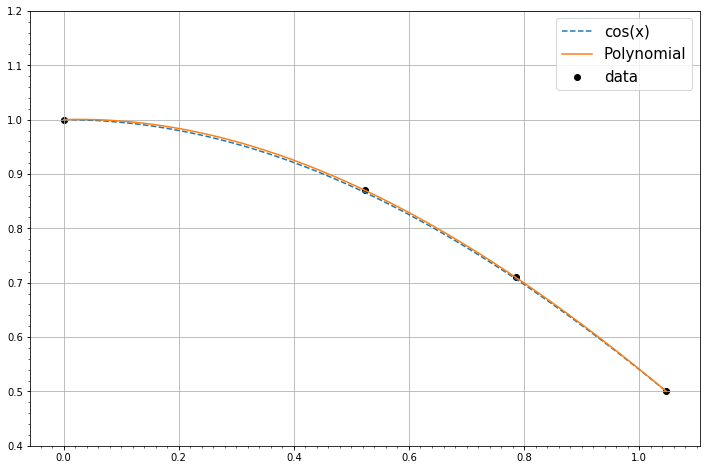

In [39]:
import matplotlib.pyplot as plt; import matplotlib.ticker as ticker
import numpy as np
p = np.pi
x = [0,p/6,p/4,p/3]
y = [1,0.87,0.71,0.5]

def P(z):
    r = 0
    for k in [0,1,2,3]:
        r += y[k]*l(z,k)
    return r
    

fig, ax = plt.subplots(1, figsize = (12,8))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.02));
ax.yaxis.set_minor_locator(ticker.MultipleLocator(0.02));
ax.set_ylim(0.8*min(y),1.2)


x0 = np.linspace(0,max(x),10**4)
cos = [np.cos(j) for j in x0]
yp = P(x0)

ax.plot(x0,cos,linestyle='dashed',label='cos(x)')
ax.scatter(x,y,c='k',label='data')
ax.plot(x0,yp,label='Polynomial')

ax.grid()
ax.legend(fontsize=15);

# 8.18a
<font size="5">
    <br>
    Выбрать вид аппроксимации Паде и найти коэффициенты апроксимации для функции $f(x) = x\,exp(-x)$

<font size="5">
    Разложим функцию по Тейлору до 4го порядка<br>
    $f(x) \approx x - x^{2} + \frac{x^{3}}{2} - \frac{x^{4}}{6}$<br>
    Представим функцию в виде: [l/m] = $\frac{a_{0} + ... + a_{l}z^{l}}{b_{0} + ... + b_{m}z^{m}},\,\, l\leq m,\, b_{0} = 1$<br><br>
    Выберем l=1 и m=3<br><br>
    $\frac{a_{0} + a_{1}x}{1 + b_{1}x + b_{2}x^{2} + b_{3}x^{3}} = x - x^{2} + \frac{x^{3}}{2} - \frac{x^{4}}{6}$<br><br>
    Разложим функцию слева по Тейлору и найдём коэффициенты<br>
    $a_{0} = 0$<br>
    $xa_{1}[1 - b_{1}x + x^{2}(b_{1}^{2} - b_{2}) + x^{3}(2b_{1}b_{2} - b_{3} - b_{1}^{3}) + ...] = x - x^{2} + \frac{x^{3}}{2} - \frac{x^{4}}{6}$<br>
    $a_{1} = 1;\,\, b_{1} = 1;\,\,b_{2} = 1/2;\,\, b_{3} = 1/6$<br>
    Аппроксимация Паде:<br><br>
    $\large \frac{x}{1 + x + \frac{x^{2}}{2} + \frac{x^{3}}{6}}$

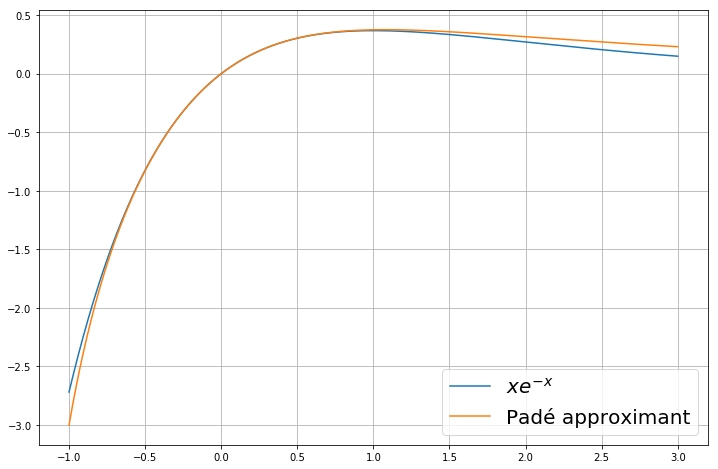

In [49]:
import matplotlib.pyplot as plt; import matplotlib.ticker as ticker
import numpy as np

fig, ax = plt.subplots(1, figsize = (12,8))

x0 = np.linspace(-1,3,10**3)
def f(z):
    return z*np.exp(-z)

def pade(z):
    return z/(1+z+z*z/2 + z*z*z/6)

y = f(x0)
P = pade(x0)

ax.plot(x0,y,label=r'$x e^{-x}$')
ax.plot(x0,P,label='Padé approximant')
ax.grid()
ax.legend(fontsize=20)

# 9.1a

<font size="5">
    Методом обратной интерполяции найти корень нелинейного уравнения, используя приведённую таблицу. Оценить точность полученного решения.
    $f(x) = x^{2} + ln(x) - 4 = 0$

In [1]:
import numpy as np
xx = [1.5,1.6,1.9,2]
yy = [-1.345,-0.97,0.252,0.693]

def f(z):
    return z**2 + np.log(z) - 4

<font size="5">
    Форма Ньютона:<br>
    $P_{n} = f(x_{0}) + f(x_{0},x_{1})(x-x_{0}) + f(x_{0},x_{1},x_{2})(x-x_{0})(x-x_{1}) + ... + 
    f(x_{0},x_{1}...x_{n})(x-x_{0})...(x-x_{n})$<br><br>
    Разделённые разницы:<br><br>
    $f(x_{k},x_{t}) = \frac{f(x_{k})-f(x_{t})}{x_{n} - x_{0}}$<br>
    $f(x_{0}...x_{n}) = \frac{f(x_{1}...x_{n}) - f(x_{0}...x_{n-1})}{x_{n} - x_{0}}$

<font size="5">
    Обратная интерполяция: x(y)<br>
    $P_{n}(y) = f(y_{0}) + f(y_{0},y_{1})(y-y_{0}) + f(y_{0},y_{1},y_{2})(y-y_{0})(y-y_{1}) + ... + 
    f(y_{0},y_{1}...y_{n})(y-y_{0})...(y-y_{n})$<br>
    Корень определяется из : $P_{n}(0)$<br>

In [2]:
import numpy as np
def newton_coeff(x, y):
    """
    x: list or np array contanining x data points
    y: list or np array contanining y data points
    """

    m = len(x)

    x = np.copy(x)
    a = np.copy(y)
    for k in range(1, m):
        a[k:m] = (a[k:m] - a[k - 1])/(x[k:m] - x[k - 1])

    return a

print("Разделённые разницы интерполяционного многочлена: ",newton_coeff(yy,xx))

Разделённые разницы интерполяционного многочлена:  [ 1.50000000e+00  2.66666667e-01 -1.32545304e-02  9.73822079e-04]


In [3]:
def newton_polynomial(x_data, y_data, x):
    """
    x_data: data points at x
    y_data: data points at y
    x: evaluation point(s)
    """
    a = newton_coeff(x_data, y_data)
    n = len(x_data) - 1  # Degree of polynomial
    p = a[n]

    for k in range(1, n + 1):
        p = a[n - k] + (x - x_data[n - k])*p

    return p

Корень: 1.8410539783846627


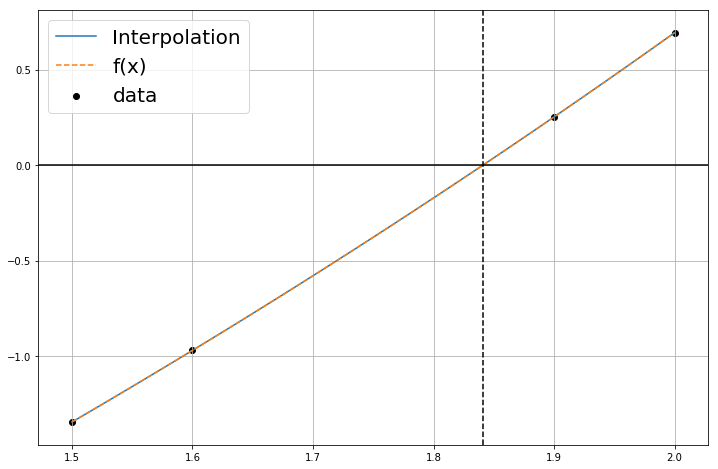

In [5]:
import matplotlib.pyplot as plt; import matplotlib.ticker as ticker
import numpy as np

fig, ax = plt.subplots(1, figsize = (12,8))

Y = np.linspace(min(yy),max(yy))
newton = newton_polynomial(yy,xx,Y)

X = np.linspace(min(xx),max(xx),10**4)
F = f(X)

ax.plot(newton,Y,label='Interpolation')
ax.scatter(xx,yy,label='data',c='k')
ax.plot(X,F,linestyle='dashed',label='f(x)')

#корень - значение обратного интерполяционного многочлена в 0
root = newton_polynomial(yy,xx,0)
print("Корень:",root)
ax.axhline(y=0,c='k')
ax.axvline(x = root,c='k',linestyle='dashed')

ax.grid()
ax.legend(fontsize=20);

<font size="5">
    Погрешность обратной интерполяции оценим как последнее слагаемое обратного интерполянта Ньютона в 0 (x(0)).<br>
    Пример:<br>
    <img src="img.png" style="width:750px;height:300px">
<br><br>
    Обратная интерполяция: x(y)<br>
    $P_{n}(y) = f(y_{0}) + f(y_{0},y_{1})(y-y_{0}) + f(y_{0},y_{1},y_{2})(y-y_{0})(y-y_{1}) + ... + 
    f(y_{0},y_{1}...y_{n})(y-y_{0})...(y-y_{n})$<br>
<br><br>
    Последнее слагаемое в нуле : $f(y_{0},y_{1}...y_{n})(0-y_{0})...(0-y_{n})$<br><br>
    Погрешность : Последняя разделённая разность $*y_{0}*y_{1}...y_{n}$<br>

In [4]:
xx = [1.5,1.6,1.9,2]
yy = [-1.345,-0.97,0.252,0.693]

import numpy as np
def newton_coeff(x, y):
    """
    x: list or np array contanining x data points
    y: list or np array contanining y data points
    """

    m = len(x)

    x = np.copy(x)
    a = np.copy(y)
    for k in range(1, m):
        a[k:m] = (a[k:m] - a[k - 1])/(x[k:m] - x[k - 1])

    return a

print("Разделённые разницы интерполяционного многочлена: ",newton_coeff(yy,xx))

err = newton_coeff(yy,xx)[-1]
for j in yy:
    err *= j

print("Погрешность обратной интерполяции : ", abs(err))

Разделённые разницы интерполяционного многочлена:  [ 1.50000000e+00  2.66666667e-01 -1.32545304e-02  9.73822079e-04]
Погрешность обратной интерполяции :  0.00022187450975309433


<font size="5">
    Погрешность обратной интерполяции порядка $10^{-4}$<br>

<font size="5">
    Найдём корень методом Ньютона и сравним<br>
    Метод Ньютона<br>
    $f(x) = x^{2} + ln(x) - 4 = 0$<br>
    $f'(x) = 2x + \frac{1}{x}$<br>
    $x_{n+1} = x_{n} - \frac{f(x_{n})}{f'(x_{n})}$<br>

In [7]:
def f(x):
    return x**2 + np.log(x) - 4

def f_prime(x):
    return 2*x + 1/x

def newton(x):
    return x - f(x)/f_prime(x)

root_interpolation = newton_polynomial(yy,xx,0)
root = newton_polynomial(yy,xx,0)
#x0 = корень, найден другим способом
i = 0
while (abs(f(root)) >= 10**(-14)):
    root = newton(root)
    i+=1
    
print("Newton:",root,i)
print(abs(root-root_interpolation))

Newton: 1.841097058450079 2
4.308006541631215e-05


<font size="5">
    Разность между корнями, полученными методами обратной интерполяции и методом Ньютона -  $4*10^{-5}$

# 9.2b

<font size="5">
    Для функции, заданной таблично, найти значение первой производной f'(0.3).<br>
    1) С помощью интерполяции<br>
    2) Методом неопределённых коэффициентов<br>

<font size="5">
    1)<br>
    Форма Ньютона:<br>
    $P_{n} = f(x_{0}) + f(x_{0},x_{1})(x-x_{0}) + f(x_{0},x_{1},x_{2})(x-x_{0})(x-x_{1}) + ... + 
    f(x_{0},x_{1}...x_{n})(x-x_{0})...(x-x_{n})$<br><br>
    Разделённые разницы:<br><br>
    $f(x_{k},x_{t}) = \frac{f(x_{k})-f(x_{t})}{x_{n} - x_{0}}$<br>
    $f(x_{0}...x_{n}) = \frac{f(x_{1}...x_{n}) - f(x_{0}...x_{n-1})}{x_{n} - x_{0}}$

In [2]:
import numpy as np
xx = [0,0.1,0.2,0.3,0.4]
yy = [5,2.5,3,-2.5,-0.2]

def newton_coeff(x, y):
    """
    x: list or np array contanining x data points
    y: list or np array contanining y data points
    """

    m = len(x)

    x = np.copy(x)
    a = np.copy(y)
    for k in range(1, m):
        a[k:m] = (a[k:m] - a[k - 1])/(x[k:m] - x[k - 1])

    return a

f = newton_coeff(xx, yy)
print("Разделённые разницы интерполяционного многочлена: ",f)

def P_newton(x_data, y_data, x):
    """
    x_data: data points at x
    y_data: data points at y
    x: evaluation point(s)
    """
    n = len(x_data) - 1  # Degree of polynomial
    p = f[n]

    for k in range(1, n + 1):
        p = f[n - k] + (x - x_data[n - k])*p

    return p

Разделённые разницы интерполяционного многочлена:  [ 5.0e+00 -2.5e+01  1.5e+02 -1.5e+03  9.5e+03]


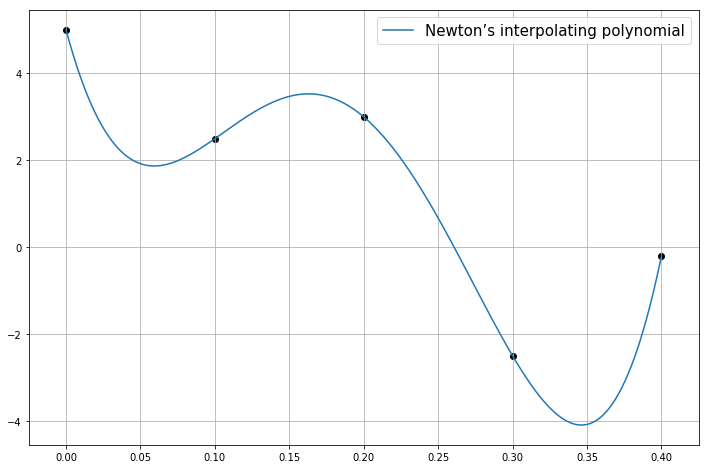

In [4]:
import matplotlib.pyplot as plt; import matplotlib.ticker as ticker
import numpy as np

fig, ax = plt.subplots(1, figsize = (12,8))

x0 = np.linspace(min(xx),max(xx),10**3)
newton = P_newton(xx,yy,x0)

ax.scatter(xx,yy,c='k')
ax.plot(x0,newton,label='Newton’s interpolating polynomial')
ax.legend(fontsize=15)
ax.grid()

<font size="5">
    Найдём производную с помощью формулы четвёртого порядка аппроксимации:<br><br>
    $\large f' = \frac{f(x-2h) - 8f(x-h) + 8f(x+h) - f(x+2h)}{12h}$

In [50]:
f = newton_coeff(xx,yy)
def derivative(z,h):
    return (P_newton(xx,yy,z-2*h) - 8*P_newton(xx,yy,z-h) + 8*P_newton(xx,yy,z+h) - P_newton(xx,yy,z+2*h))/(12*h)
der = derivative(0.3,10**(-8))
print("f'(0.3) = ",der)

f'(0.3) =  -58.000000032383994


<font size="5">
    $\textbf{f'(0.3) = -58}$

<font size="5">
    2)
    Метод неопределённых коэффициентов :<br><br>
    $f'(0.3) = Af(0) + Bf(0.1) + Cf(0.2) + Df(0.3) + Ef(0.4)$<br><br>
    $f'(0.3) = f(0.3)[A+B+C+D+E] + $<br>
    $\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,f'(0.3)[-0.3A -0.2B - 0.1C + 0.1E] +$<br>
    $\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,f''(0.3)[0.3^{2}A + 0.2^{2}B + 0.1^{2}C + 0.1^{2}E]/2! + ...$<br>
    $\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,f^{(4)}[...]/4!$<br>
    \begin{cases}
      A + B + C + D + E = 0\\
      -0.3A -0.2B - 0.1C + 0.1E = 1\\
      ...
    \end{cases} <br>

In [9]:
import numpy as np
import math

xx = [0,0.1,0.2,0.3,0.4]
yy = [5,2.5,3,-2.5,-0.2]

M = np.zeros((5,5))

n = 3 #numero do x onde vamo achar a derivada
for i in range(5):
    for j in range(5):
        M[i][j] = ((xx[j]-xx[n])**(i))/math.factorial(i)
print(M)
f = [0,1,0,0,0]

coeff = np.linalg.solve(M,f)
print(coeff)

derivative = 0
for j in range(len(yy)):
    derivative += coeff[j]*yy[j]
print("Производная : ", derivative)

[[ 1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
   1.00000000e+00]
 [-3.00000000e-01 -2.00000000e-01 -1.00000000e-01  0.00000000e+00
   1.00000000e-01]
 [ 4.50000000e-02  2.00000000e-02  5.00000000e-03  0.00000000e+00
   5.00000000e-03]
 [-4.50000000e-03 -1.33333333e-03 -1.66666667e-04  0.00000000e+00
   1.66666667e-04]
 [ 3.37500000e-04  6.66666667e-05  4.16666667e-06  0.00000000e+00
   4.16666667e-06]]
[ -0.83333333   5.         -15.           8.33333333   2.5       ]
Производная :  -58.00000000000004


<font size="5">
    $\textbf{f'(0.3) = -58}$